In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage import io
from scipy import misc
import mahotas as mh
import scipy.ndimage as ndimage

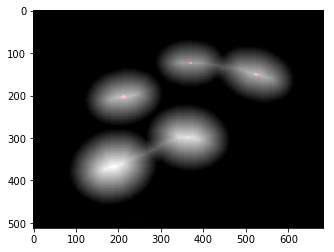

Individual circles in the picture: 5


In [65]:
dna = mh.imread('../images_assignment/circles.png')
dnaf = mh.gaussian_filter(dna,25).astype(np.uint8)
rmax = mh.regmax(dnaf)
plt.imshow(mh.overlay(dna, rmax))
plt.show()
seeds,nr_nuclei = mh.label(rmax)
print("Individual circles in the picture:", nr_nuclei)

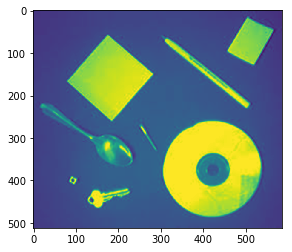

TypeError: mahotas.otsu: This function only accepts integer types (passed array of type float64)

In [6]:
obj = mh.imread('../images_assignment/objects.png',as_grey=True)

plt.imshow(obj)
plt.show()

objf = ndimage.gaussian_filter(obj,25)
objt= mh.thresholding.otsu(objf)

plt.imshow(objt)
plt.show()

rmax = mh.regmax(objf)

plt.imshow(mh.overlay(obj, rmax))
plt.show()
seeds,count = mh.label(rmax)
print("Individual objects in the picture:",count)




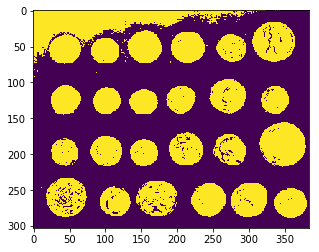

[[False  True  True ..., False False False]
 [False  True  True ..., False False False]
 [ True  True  True ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


In [14]:
from skimage import data
coins = data.coins()
#edges = filters.sobel(coins)
threshold = filters.threshold_otsu(coins)
binary = coins > threshold

plt.imshow(binary)
plt.show()
print(binary)



In [11]:
?filters.threshold_otsu

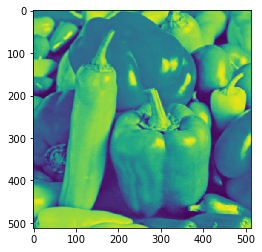

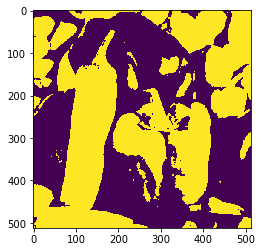

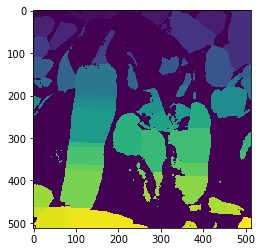

Individual peppers in the picture: 61


In [82]:
#Counting objects using Watershed algorithm in Mahotas 

nuclear = mahotas.imread('../images_assignment/peppers.png')
nuclear = nuclear[:,:,0]
nuclear = mahotas.gaussian_filter(nuclear, 1)

plt.imshow(nuclear)
plt.show()

threshed  = (nuclear > nuclear.mean())
plt.imshow(threshed)
plt.show()

distances = mahotas.stretch(mahotas.distance(threshed))
Bc = np.ones((9,9))

maxima = mahotas.morph.regmax(distances, Bc=Bc)
spots,n_spots = mahotas.label(maxima, Bc=Bc)
surface = (distances.max() - distances)
areas = mahotas.cwatershed(surface, spots)
areas *= threshed

plt.imshow(areas)
plt.show()

seeds,count = mahotas.label(areas)
print("Individual peppers in the picture:",count)

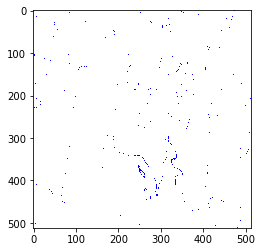

Individual peppers in the picture: 20


In [91]:
#By thresholding method

pepper = io.imread('../images_assignment/peppers.png')

pepperf = ndimage.gaussian_filter(pepper,4)

pepper_t = mahotas.thresholding.otsu(pepperf)

result = pepperf > pepper_t

plt.imshow((result))
plt.show()

seeds,count = mh.label(result)

print("Individual peppers in the picture:",count)
